# <center>Machine Learning Experiment </center>

<center>oleh: </center>
<center>Alson Cahyadi 13514035</center>
<center>Ramos Janoah 13514089</center>
<center>Jovian Christianto 13514101</center>


## Task Specification
Spesifikasi task pada eksperimen ini adalah sebagai berikut:
![Task](spek.jpg)

### checking sckit-learn version

In [2]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.18.1.


## Import Library

In [3]:
import pandas as pd
import numpy as np

## 2a. Reading Dataset
Dataset yang dibaca adalah dataset iris.csv dan tennis.csv

In [4]:
# reading iris
iris = pd.read_csv('data/iris.csv')
# reading tennis
tennis = pd.read_csv('data/tennis.csv')

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
tennis.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


## 2b. Full Training

### Preparing the dataset

In [7]:
feature = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].as_matrix()
label = iris['species'].values

### Decision Tree training for Iris Dataset - Full training

In [8]:
from sklearn import tree

clf_tree_fulltrain = tree.DecisionTreeClassifier()
clf_tree_fulltrain = clf_tree_fulltrain.fit(feature, label)

### ANN training for Iris Dataset - Full training

In [9]:
from sklearn import neural_network
from sklearn.neural_network import MLPClassifier

clf_nn_fulltrain = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2))
clf_nn_fulltrain = clf_nn_fulltrain.fit(feature, label)

## 2c. Split test 

In [10]:
# using previous feature and label
from sklearn.model_selection import train_test_split

feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size = 0.1)

### Decision Tree training for Iris Dataset - Split Test

In [11]:
from sklearn import tree

clf_tree_split = tree.DecisionTreeClassifier()
clf_tree_split.fit(feature_train, label_train)

class_predict = clf_tree_split.predict(feature_test)

from sklearn.metrics import confusion_matrix

confusion_matrix(class_predict, label_test)

array([[3, 0, 0],
       [0, 8, 0],
       [0, 0, 4]])

### ANN training for Iris Dataset - Split Test

In [12]:
from sklearn.neural_network import MLPClassifier

clf_nn_split = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2))

clf_nn_split.fit(feature_train, label_train)

class_predict = clf_nn_split.predict(feature_test)

from sklearn.metrics import confusion_matrix

confusion_matrix(class_predict, label_test)

array([[3, 0, 0],
       [0, 8, 0],
       [0, 0, 4]])

## 2d. 10-fold cross validation

### Decision Tree training for Iris Dataset - 10-fold

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kf = KFold(n_splits = 10)
print(kf)

for train_index, test_index in kf.split(feature):
    #print("TRAIN:", train_index, "TEST:", test_index)
    clf_tree_10fold = tree.DecisionTreeClassifier()
    clf_tree_10fold.fit(feature[train_index], label[train_index])
    
    label_predict = clf_tree_10fold.predict(feature[test_index])
    #print(label_predict)
    #print(label[test_index])
    print("Accuracy: " + str(accuracy_score(label_predict, label[test_index])))

KFold(n_splits=10, random_state=None, shuffle=False)
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.933333333333
Accuracy: 0.933333333333
Accuracy: 0.866666666667
Accuracy: 1.0
Accuracy: 0.866666666667
Accuracy: 0.733333333333
Accuracy: 1.0


### ANN training for Iris Dataset - 10-fold

In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kf = KFold(n_splits = 10)
print(kf)

for train_index, test_index in kf.split(feature):
    #print("TRAIN:", train_index, "TEST:", test_index)
    clf_nn_10fold = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2))
    for i in range(0,10):
        clf_nn_10fold.fit(feature_train, label_train)

    class_predict = clf_nn_10fold.predict(feature_test)
    #print(label_predict)
    #print(label[test_index])
    print("Accuracy: " + str(accuracy_score(label_predict, label[test_index])))

KFold(n_splits=10, random_state=None, shuffle=False)
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.333333333333
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0


## 2e. Save Model

In [15]:
from sklearn.externals import joblib
    
def saveModel(clf, filename):
    joblib.dump(clf, filename) 

    
saveModel(clf_nn_split, 'model1.pkl')    

## 2f. Load Model

In [16]:
from sklearn.externals import joblib

def loadModel(filename):
    clf = joblib.load(filename) 
    return clf

model = loadModel('model1.pkl')
print(model)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


## 2g. Create New Instance

In [17]:
#creating new instance

x = [5, 3.5, 1, 1]


## 2h. Classification

In [18]:
y_tree = clf_tree_fulltrain.predict([x])
y_nn = clf_nn_fulltrain.predict([x])
print(y_tree)
print(y_nn)

['setosa']
['setosa']


## 2i. Feature Analysis using Python

In [19]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Plotting sepal_length with Species


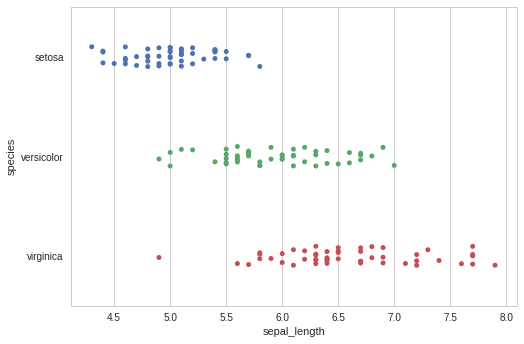



Plotting sepal_width with Species


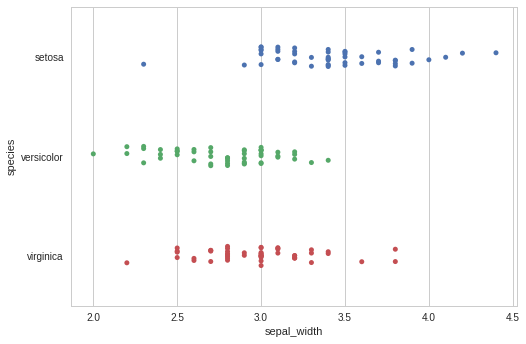



Plotting petal_length with Species


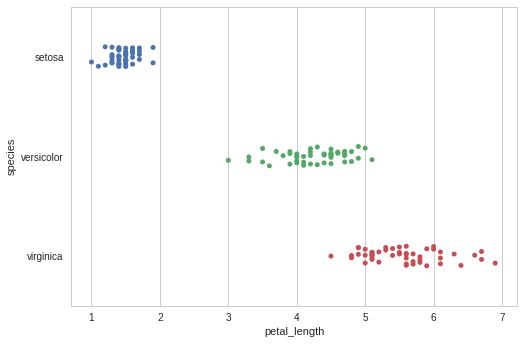



Plotting petal_width with Species


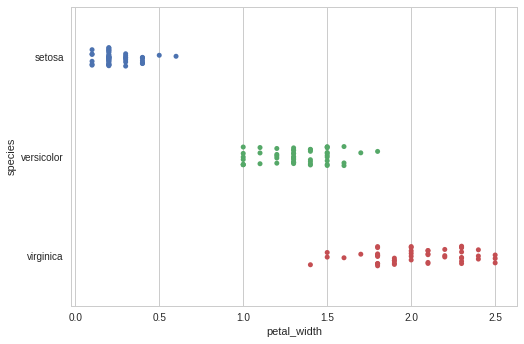

In [44]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

feature = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for fea in feature:
    print("Plotting " + fea + " with Species")
    sns.stripplot(x=fea,y='species', data=iris, jitter=True)
    sns.plt.show()
    print("\n")